# Introduction

In this project, we will be building a garden monitoring tool using traditional machine learning techniques. The task at hand involves selecting either the K-Nearest Neighbors (KNN) or Naïve Bayes algorithm to perform the classification. The details of Task 1 are outlined below:

## Task 1: Garden Monitoring with KNN and Convolutational Neural Networks (CNNs)

Task 1 requires the following steps to be carried out:

(a) Downloading a video from a provided URL and inspecting it to identify three crops of interest, as well as grass.
(b) Cropping out or annotating the crops and grass using an image cropping/annotating tool.
(c) Inspecting and analyzing the cropped or annotated images to identify a suitable set of features for classification purposes. These features could include color histograms, edges, SIFT, SURF, pixel values, and more.
(d) Developing a feature extraction algorithm to extract the identified features and creating a training dataset using these features.
(e) Training a KNN or Naïve Bayes machine learning model using the training dataset.
(f) Testing the performance of the trained model and reporting the results.

In the subsequent sections, we will delve into each step in detail and demonstrate the implementation of the chosen algorithm – KNN or Naïve Bayes – for garden monitoring.


In [8]:
import cv2

print(cv2.__version__)

4.7.0


In [9]:
# !pip install opencv-python==3.0.0

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

## Loading required libraries

In [11]:
import os
import cv2
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
# from lime import lime_image
from skimage.segmentation import mark_boundaries
# from lime import lime_tabular
from skimage.feature import canny

## Loading the dataset

In [12]:
# Define the directory paths
data_dir = '/kaggle/input/ericdatasetmaize/train'
classes = ['Cassava', 'Grass', 'Sugarcane', 'Maize']

# Define the feature vector and labels
features = []
labels = []


## Data preparation and pre-processing

Class: Cassava - Number of samples: 297
Class: Grass - Number of samples: 599
Class: Maize - Number of samples: 624
Class: Sugarcane - Number of samples: 103


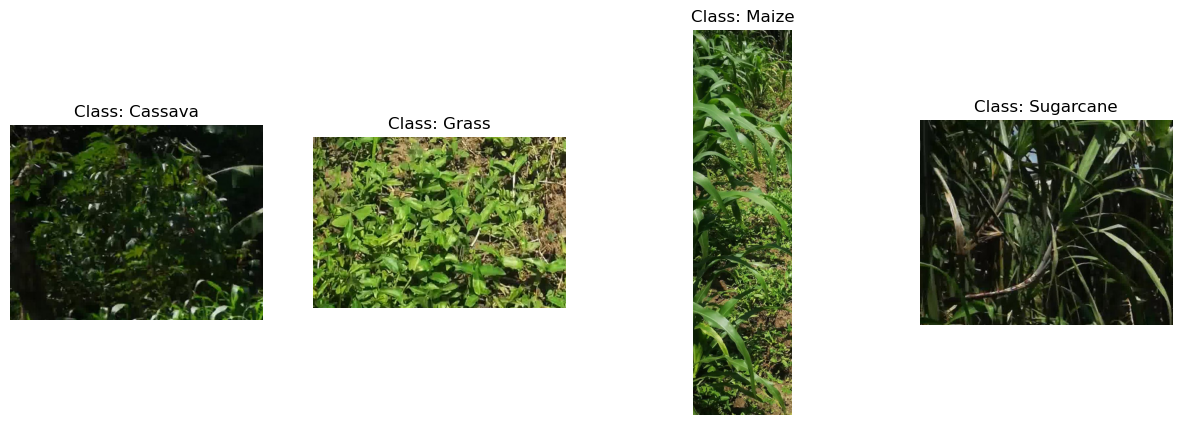

In [13]:
class_folders = os.listdir(data_dir)
num_classes = len(class_folders)

# Create a dictionary to store the number of samples for each class
class_samples = {}

# Iterate over the class folders
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)
        num_samples = len(image_files)
        class_samples[class_folder] = num_samples

# Print the number of samples for each class
for class_name, num_samples in class_samples.items():
    print(f"Class: {class_name} - Number of samples: {num_samples}")

# Visualize the first image from each class
fig, axs = plt.subplots(1, num_classes, figsize=(15, 5))

for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)
        if len(image_files) > 0:
            image_file = image_files[0]  # Take the first image in the class folder
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            axs[i].imshow(image_rgb)
            axs[i].set_title(f'Class: {class_folder}')
            axs[i].axis('off')

plt.show()

## Feature Extraction

In [14]:
# Iterate over the classes
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    # Iterate over the images in the class directory
    for image_name in tqdm(os.listdir(class_dir)):
        image_path = os.path.join(class_dir, image_name)

        # Read the image
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Convert the image to the HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Compute the color histogram
        histogram = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 180, 0, 256, 0, 256])

        # Normalize the histogram
        histogram = cv2.normalize(histogram, histogram).flatten()

        # # Extract edges using Canny algorithm
        # edges = canny(gray_image, sigma=1.0)

        # # Extract SIFT features
        # # Convert the image to grayscale

#         sift = cv2.xfeatures2d.SIFT_create()
#         keypoints, descriptors = sift.detectAndCompute(gray_image, None)

        # # Extract ORB features
        # orb =cv2.ORB_create()
        # keypoints, descriptors = orb.detectAndCompute(gray_image, None)

        # # Extract pixel values
        # pixels = image.flatten()

        # Create a dictionary to store the features
        image_features = {
            'histogram': histogram,
            # 'edges': edges,
            # 'sift': descriptors,
            # 'orb': descriptors,
            # 'pixels': pixels
        }

        # Add the features to the feature vector
        features.append(image_features)

        # Add the label to the labels list
        labels.append(class_name)

# Convert the feature vector and labels to NumPy arrays
features = np.array(features)

# Create separate feature arrays for each algorithm
histogram_features = np.array([image_features['histogram'] for image_features in features])
# edges_features = np.array([image_features['edges'] for image_features in features])
# sift_features = np.array([image_features['sift'] for image_features in features])
# orb_features = np.array([image_features['orb'] for image_features in features])
# pixels_features = np.array([image_features['pixels'] for image_features in features])

# Convert the labels to a NumPy array
labels = np.array(labels)

# Save the features and labels to files
np.save('features_histogram.npy', histogram_features)
# np.save('features_edges.npy', edges_features)
# np.save('features_sift.npy', sift_features)
# np.save('features_orb.npy', orb_features)
# np.save('features_pixels.npy', pixels_features)
np.save('labels.npy', labels)

# # Example: Plotting edges for the first image
# edges = histogram_features[0]
# plt.imshow(edges, cmap='gray')
# plt.title('histogram')
# plt.show()

100%|██████████| 624/624 [00:17<00:00, 34.70it/s]


In [15]:
# Define the list of algorithms
algorithms = ['histogram']
# Create an empty dictionary to store the loaded features
loaded_features = {}

# Load the features for each algorithm
for algorithm in algorithms:
    # Load the features from the corresponding file
    features = np.load(f'/kaggle/working/features_{algorithm}.npy', allow_pickle=True)

    # Store the loaded features in the dictionary
    loaded_features[algorithm] = features

# Load the labels
labels = np.load('/kaggle/working/labels.npy', allow_pickle=True)

In [16]:
print(f"shape of Histogram {loaded_features['histogram'].shape}")
# print(f"shape of chi_square_stats {loaded_features['chi_square_stats'].shape}")
# print(f"shape of chi_square_p_value {loaded_features['chi_square_p_value'].shape}")
# print(f"shape of shift {loaded_features['shift'].shape}")
# # print(f"shape of surf {loaded_features['surf'].shape}")
# print(f"shape of edges {loaded_features['edges'].shape}")
# print(f"shape of pixels {loaded_features['pixels'].shape}")

shape of Histogram (1623, 512)


## Training the K-NN model on the extracted features

In [17]:
# Load the features and labels from the saved files
# features = np.load('features_hist.npy')
# labels = np.load('labels.npy')
algorithms = ['histogram']
# # Shuffle the data
# features, labels = shuffle(features, labels, random_state=42)

# # Perform feature scaling
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)

# # Perform feature selection
# k = 100  # Number of top features to select
# feature_selector = SelectKBest(f_classif, k=k)
# features_selected = feature_selector.fit_transform(features_scaled, labels)

# # Perform data augmentation (example: flipping horizontally)
# augmented_features = np.concatenate((features_selected, np.fliplr(features_selected)), axis=0)
# augmented_labels = np.concatenate((labels, labels), axis=0)

# # Split the augmented data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(augmented_features, augmented_labels, test_size=0.2, random_state=42)
# Create dictionaries to store preprocessed data for each algorithm
# Create dictionaries to store preprocessed data for each algorithm
# Create dictionaries to store preprocessed data for each algorithm
preprocessed_data = {}

# Preprocess the data for each algorithm
for algorithm in algorithms:
    # Retrieve the features for the current algorithm
    features = loaded_features[algorithm]

    # Retrieve the labels
    labels = labels

    # Shuffle the data
    features, labels = shuffle(features, labels, random_state=42)

    print(f"Algorithm: {algorithm}")
    print(f"Features shape before scaling: {features.shape}")
    print(f"Features type before scaling: {features.dtype}")

    # Perform feature scaling
    scaler = StandardScaler()
    try:
        features_scaled = scaler.fit_transform(features)
    except Exception as e:
        print(f"Error occurred during feature scaling: {e}")
        continue

    print(f"Features shape after scaling: {features_scaled.shape}")
    print(f"Features type after scaling: {features_scaled.dtype}")

    # Perform feature selection
    k = 100  # Number of top features to select
    feature_selector = SelectKBest(f_classif, k=k)
    features_selected = feature_selector.fit_transform(features_scaled, labels)

    # Perform data augmentation (example: flipping horizontally)
    augmented_features = np.concatenate((features_selected, np.fliplr(features_selected)), axis=0)
    augmented_labels = np.concatenate((labels, labels), axis=0)

    # Split the augmented data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(augmented_features, augmented_labels, test_size=0.2, random_state=42)

    # Store the preprocessed data for the current algorithm
    preprocessed_data[algorithm] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

Algorithm: histogram
Features shape before scaling: (1623, 512)
Features type before scaling: float32
Features shape after scaling: (1623, 512)
Features type after scaling: float32


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [191 223 231 236 237 238 239 243 244 245 246 247 251 252 253 254 255 311
 317 318 319 359 367 373 374 375 380 381 382 383 406 407 413 414 415 420
 421 422 423 428 429 430 431 434 435 436 437 438 439 442 443 444 445 446
 447 510 511] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## Model Testing and  Evaluation

In [18]:
from sklearn.model_selection import GridSearchCV
import lime
import lime.lime_tabular
# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }
# algorithms = ['histogram']

# # Create the KNN classifier
# knn = KNeighborsClassifier()

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(knn, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and train the KNN classifier with them
# best_params = grid_search.best_params_
# knn_best = KNeighborsClassifier(**best_params)
# knn_best.fit(X_train, y_train)
# Iterate over the algorithms
for algorithm in algorithms:
    # Retrieve the preprocessed data for the current algorithm
    data = preprocessed_data[algorithm]
    X_train = data['X_train']
    y_train = data['y_train']
    X_test = data['X_test']
    y_test = data['y_test']

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    # Create the KNN classifier
    knn = KNeighborsClassifier()

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and train the KNN classifier with them
    best_params = grid_search.best_params_
    knn_best = KNeighborsClassifier(**best_params)
    knn_best.fit(X_train, y_train)

    # Evaluate the model on the test set
    accuracy = knn_best.score(X_test, y_test)
    print(f"Algorithm: {algorithm}")
    print(f"Best hyperparameters: {best_params}")
    print(f"Test accuracy: {accuracy}")
    print("------")


Algorithm: histogram
Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Test accuracy: 0.88
------


Algorithm: histogram
Classification Report:
              precision    recall  f1-score   support

     Cassava       0.86      0.79      0.82       122
       Grass       0.89      0.96      0.92       236
       Maize       0.92      0.87      0.89       248
   Sugarcane       0.68      0.77      0.72        44

    accuracy                           0.88       650
   macro avg       0.84      0.85      0.84       650
weighted avg       0.88      0.88      0.88       650

Confusion Matrix:
[[ 96   3   8  15]
 [  1 226   9   0]
 [  6  25 216   1]
 [  8   0   2  34]]


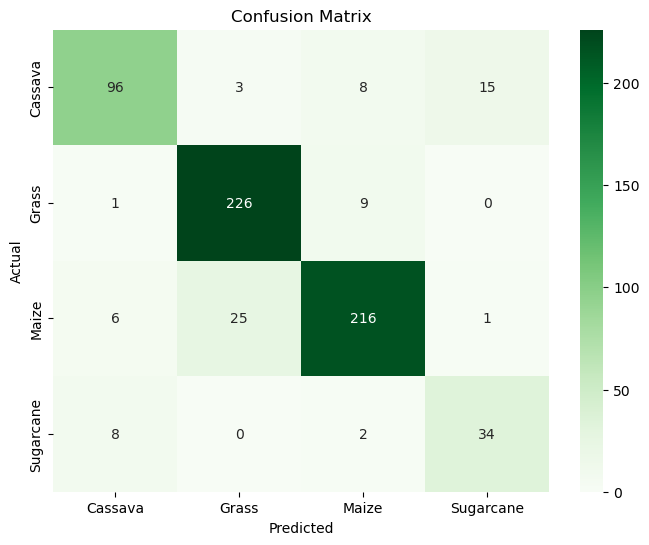

------


In [19]:
# Iterate over the algorithms
for algorithm in algorithms:
    # Retrieve the preprocessed data for the current algorithm
    data = preprocessed_data[algorithm]
    X_test = data['X_test']
    y_test = data['y_test']

    # Make predictions on the test set using the best model
    y_pred = knn_best.predict(X_test)

    # Evaluate the model
    print(f"Algorithm: {algorithm}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    # Get the class labels
    class_labels = np.unique(labels)

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("------")

## Training the Naive Bayes Model

Algorithm: histogram
Classification Report:
              precision    recall  f1-score   support

     Cassava       0.71      0.40      0.51       122
       Grass       0.76      0.83      0.79       236
       Maize       0.71      0.72      0.72       248
   Sugarcane       0.39      0.64      0.48        44

    accuracy                           0.70       650
   macro avg       0.64      0.65      0.63       650
weighted avg       0.71      0.70      0.69       650

Confusion Matrix:
[[ 49   8  30  35]
 [  4 197  35   0]
 [  7  54 178   9]
 [  9   1   6  28]]


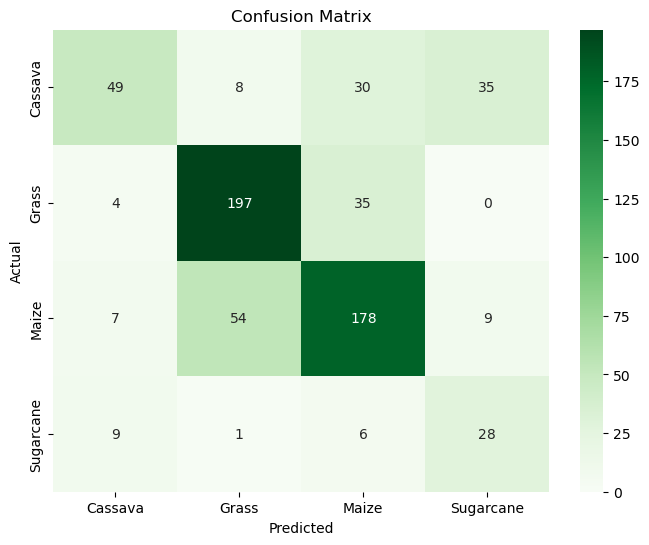

------


In [20]:
# Iterate over the algorithms
for algorithm in algorithms:
    # Retrieve the preprocessed data for the current algorithm
    data = preprocessed_data[algorithm]
    X_train = data['X_train']
    y_train = data['y_train']
    X_test = data['X_test']
    y_test = data['y_test']

    # Perform feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }

    # Create the Naïve Bayes classifier
    naive_bayes = GaussianNB()

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters and train the Naïve Bayes classifier with them
    best_params = grid_search.best_params_
    naive_bayes_best = GaussianNB(**best_params)
    naive_bayes_best.fit(X_train_scaled, y_train)

    # Make predictions on the test set using the best model
    y_pred = naive_bayes_best.predict(X_test_scaled)

    # Evaluate the model
    print(f"Algorithm: {algorithm}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    # Get the class labels
    class_labels = np.unique(labels)

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("------")

## Training the CNN model

In [21]:
# Preprocessing and cleaning steps
def preprocess_image(image):
    # Resize the image to a fixed size
    resized_image = cv2.resize(image, (256, 256))

    # Normalize the pixel values to the range [0, 1]
    normalized_image = resized_image / 255.0

    # Perform additional cleaning and pre-processing operations if needed

    return normalized_image

In [22]:
images = []
labels = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)

        # Read the image
        image = cv2.imread(image_path)

        # Preprocess and clean the image
        preprocessed_image = preprocess_image(image)

        # Add the preprocessed image to the list
        images.append(preprocessed_image)

        # Add the label to the list
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)


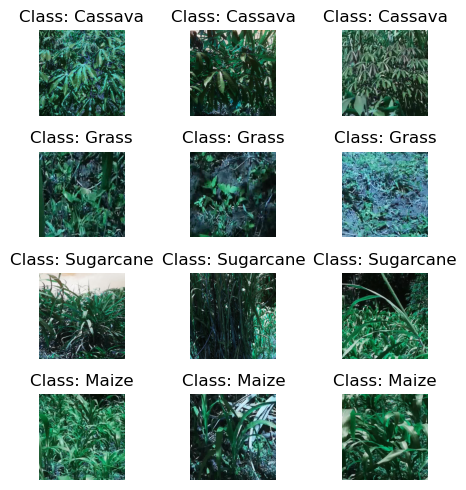

In [23]:
num_samples = 3
fig, axes = plt.subplots(len(classes), num_samples, figsize=(5, 5))
for i, class_name in enumerate(classes):
    class_images = images[labels == class_name]
    random_indices = np.random.choice(len(class_images), num_samples, replace=False)
    for j, idx in enumerate(random_indices):
        axes[i, j].imshow(class_images[idx])
        axes[i, j].set_title(f"Class: {class_name}")
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

### Model Training 

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Set the path to your data folder
data_dir = "/kaggle/input/ericdatasetmaize/train"



# Set the batch size and image dimensions
batch_size = 64
img_height, img_width = 224, 224

# Set the number of classes
num_classes = 4

# Set the number of epochs and initial learning rate for hyperparameter tuning
num_epochs = 30
initial_learning_rate = 0.001

# Split the data into train, test, and validation sets using an 80:10:10 ratio
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')


test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


# Build the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define a learning rate schedule for hyperparameter tuning
def lr_schedule(epoch):
    return initial_learning_rate * 0.1 ** (epoch // 10)

# Set up callbacks for hyperparameter tuning, learning curves, and early stopping
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[lr_callback, early_stopping_callback])

# Evaluate the model on the test set
# test_generator = train_datagen.flow_from_directory(
#     data_dir,
#     target_size=(img_height, img_width),
#     batch_size=1,
#     class_mode='categorical',
#     shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)

# Generate predictions
test_generator.reset()
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=-1)

# Generate predictions
test_generator.reset()
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=-1)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Found 1463 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 35s 792ms/step - loss: 1.3690 - accuracy: 0.3671 - val_loss: 1.1724 - val_accuracy: 0.5750 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 11s 485ms/step - loss: 1.1150 - accuracy: 0.4696 - val_loss: 0.7997 - val_accuracy: 0.7937 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 12s 513ms/step - loss: 0.7261 - accuracy: 0.7457 - val_loss: 0.6048 - val_accuracy: 0.7437 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 11s 489ms/step - loss: 0.6536 - accuracy: 0.7710 - val_loss: 0.5756 - val_accuracy: 0.7437 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 11s 488ms/step - loss: 0.5448 - accuracy: 0.8059 - val_loss: 0.3742 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 12s 521ms/step - loss: 0.4567 - accuracy: 0.8407 - val_loss: 0.2960 - val_accuracy: 0.8938 - lr: 0.0010
Epoch 7/30
23/23 [==============================] - 11s 477ms/step - loss: 

### Model Testing and Evaluation

Classification Report:
              precision    recall  f1-score   support

     Cassava       0.81      0.90      0.85        29
       Grass       0.97      0.97      0.97        59
   Sugarcane       0.97      0.97      0.97        62
       Maize       0.86      0.60      0.71        10

    accuracy                           0.93       160
   macro avg       0.90      0.86      0.87       160
weighted avg       0.93      0.93      0.93       160



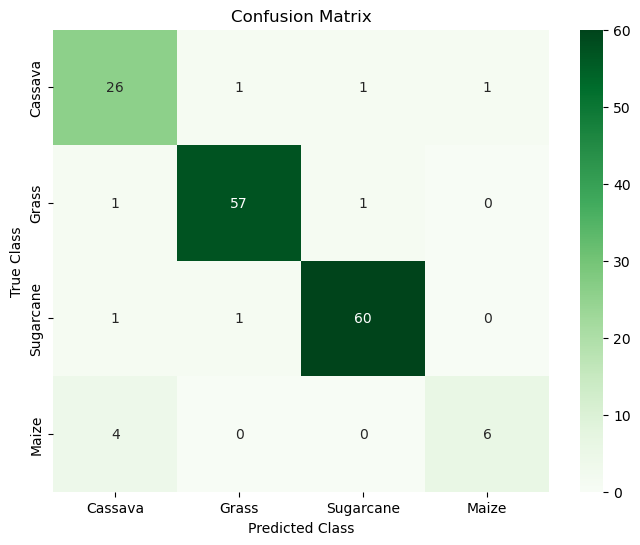

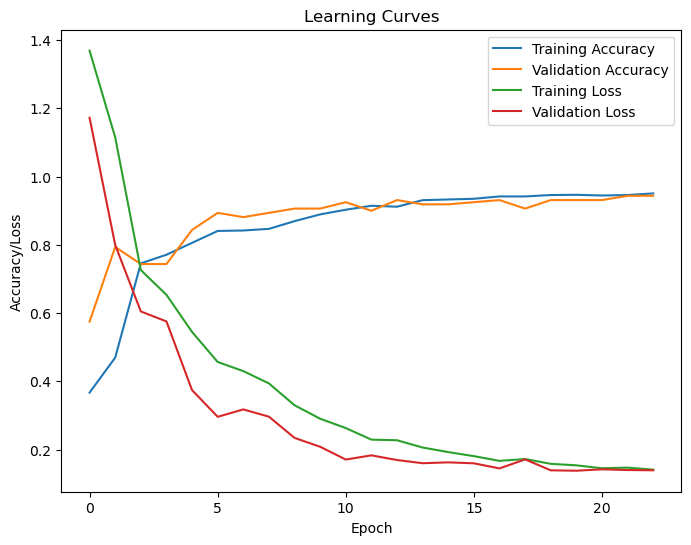

In [25]:
import seaborn as sns
# Print classification report with labels
class_labels = ['Cassava', 'Grass', 'Sugarcane', 'Maize']
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)

# Plot confusion matrix with values
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Greens, xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend()
plt.show()


### Model Explainability and Interpretation

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


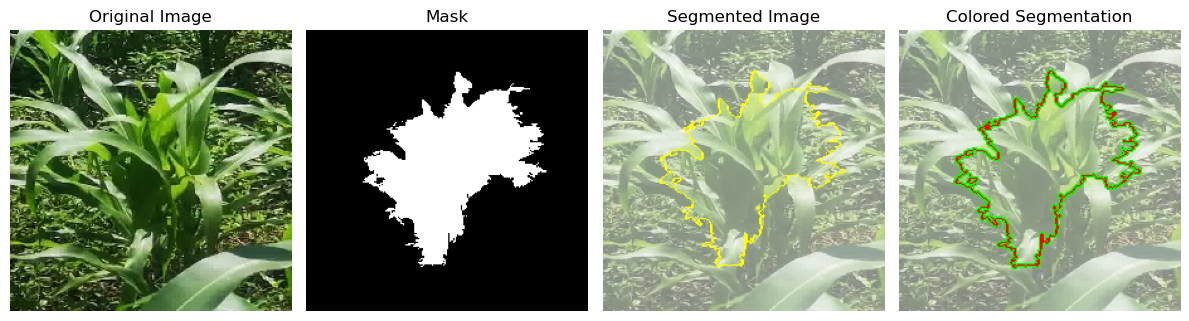

In [26]:
import lime.lime_image
from skimage.segmentation import mark_boundaries

# Choose an image from the test set for interpretation
sample_image_path = "/kaggle/input/ericdatasetmaize/train/Maize/02f54fe9-output_00072_crop_512.jpg"  # Replace with the path to your sample image

# Load the image and preprocess it
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(img_height, img_width))
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image) / 255.0

# Create a LimeImageExplainer
explainer = lime.lime_image.LimeImageExplainer()

# Define the function to classify images using the trained model
def classify_images(images):
    predictions = model.predict(images)
    return predictions

# Create the explanation using LIME
explanation = explainer.explain_instance(sample_image, classifier_fn=classify_images, top_labels=num_classes, num_samples=1000)

# Get the explanation for the predicted class
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
segmented_image = mark_boundaries(temp / 2 + 0.5, mask)

# Convert the segmented image to a colorful segmentation
colored_segmented_image = mark_boundaries(temp / 2 + 0.5, mask, outline_color=(0, 255, 0), color=(255, 0, 0))

# Display the original image, masked image, and segmented image
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(sample_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(143)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

plt.subplot(144)
plt.imshow(colored_segmented_image)
plt.title('Colored Segmentation')
plt.axis('off')

plt.tight_layout()
plt.show()
